In [1]:
# importing the required libraries
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

# printing the versions of the libraries in the algorithm
print('python:{}'.format(sys.version))
print('numpy:{}'.format(numpy.__version__))
print('pandas:{}'.format(pandas.__version__))
print('matplotlib:{}'.format(matplotlib.__version__))
print('seaborn:{}'.format(seaborn.__version__))
print('scipy:{}'.format(scipy.__version__))
print('sklearn:{}'.format(sklearn.__version__))

Matplotlib is building the font cache; this may take a moment.


python:3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
numpy:1.19.2
pandas:1.1.3
matplotlib:3.3.2
seaborn:0.11.0
scipy:1.5.2
sklearn:0.23.2


In [2]:
# giving the alias names for the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv file using pandas
data=pd.read_csv('creditcard.csv')

In [4]:
#printing the column names in the csv files
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
# printing the row count and column count
print(data.shape)

(284807, 31)


In [6]:
# printing the data for understanding 
print(data)
print(data.describe())

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [7]:
# refining data to know how many rows have value 1 in class column
data=data.sample(frac=0.1,random_state=1)

# printing the new row count and column count
print(data.shape)

(28481, 31)


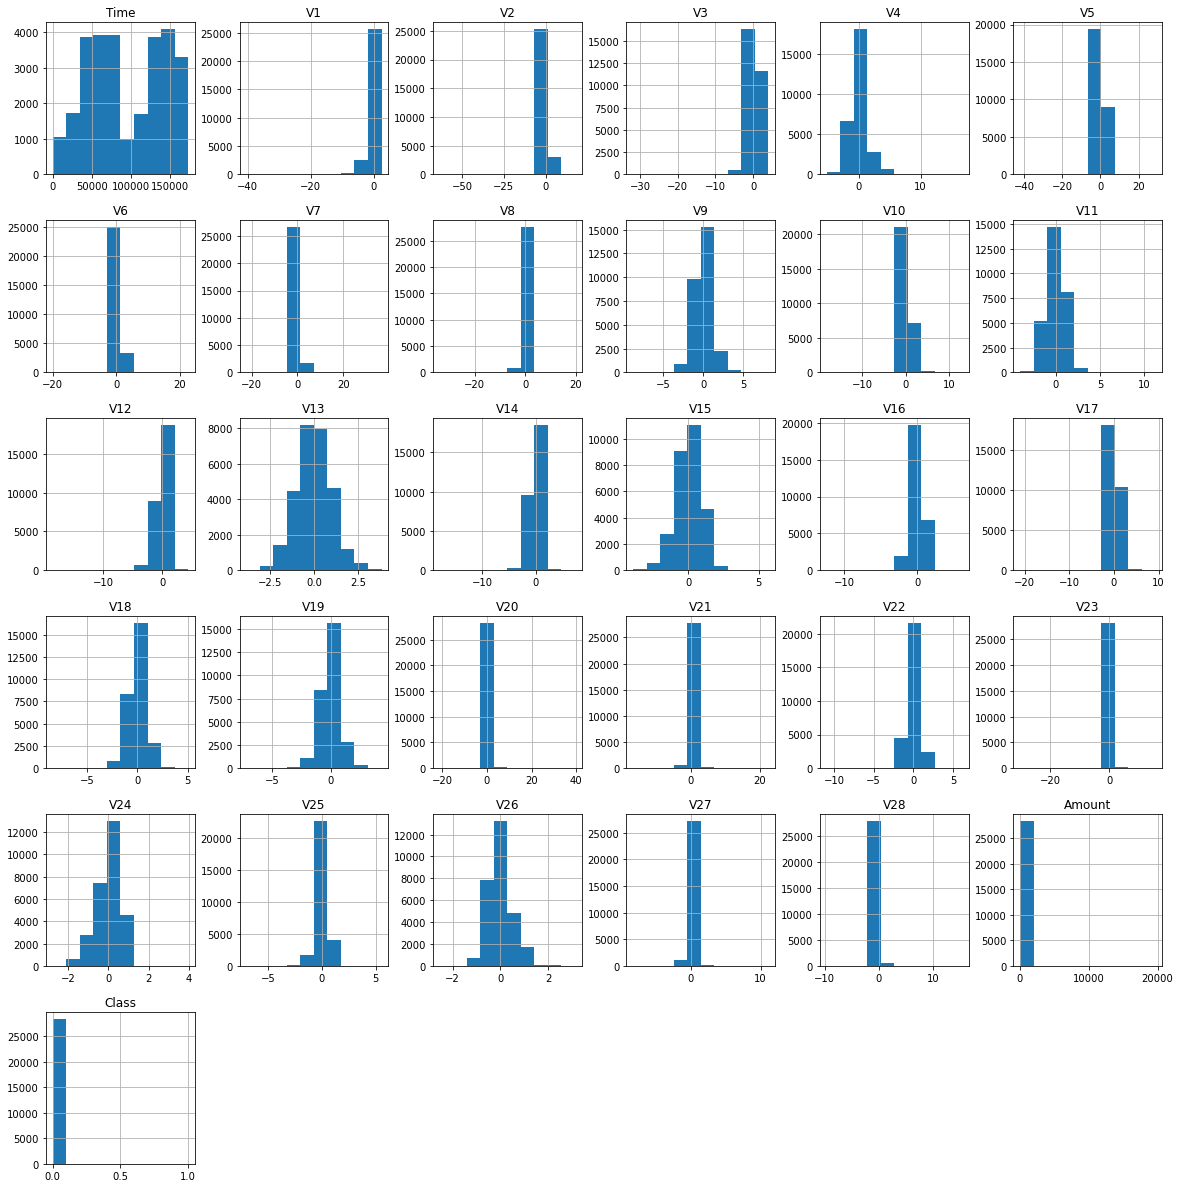

In [8]:
# plotting every column in hist diagrams 

data.hist(figsize=(20,21))
plt.show()

In [9]:
# declaring the fraud and valid variables

# fraud class takes the value 1 rows from column class
# valid class takes the values 0 rows from column class

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

# Ouliner_fraction is to understand that any data point which differs greatly from the rest of the observations in a dataset
Outlier_Fraction= len(Fraud) / float(len(Valid))

print(Outlier_Fraction)

# printing the fraud and valid cases
print('Fraud Cases:{}'.format(len(Fraud)))
print('Valid Cases:{}'.format(len(Valid)))

0.0017234102419808666
Fraud Cases:49
Valid Cases:28432


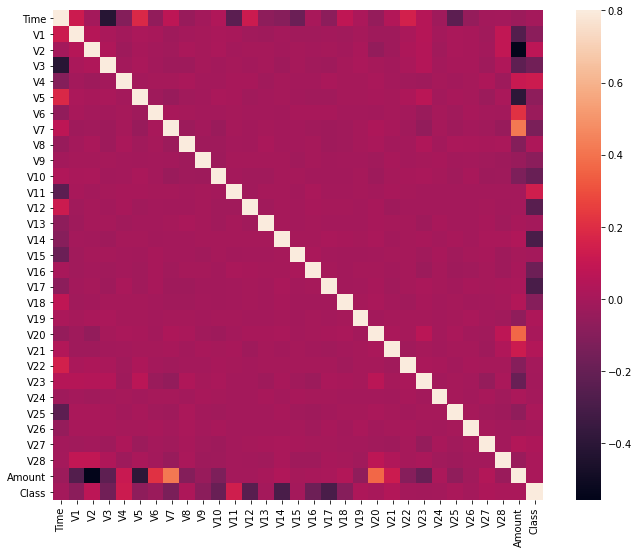

In [10]:
# plotting the heat map

corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [11]:
columns=data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
target="Class"

# creating target data for class column, so that the precisions will be calculated 
X=data[columns]
Y=data[target]
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [12]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state=1

# classifiers using in the algorithm

classifiers={
    "Isolation Forest":IsolationForest(
    max_samples=len(X),
    contamination=Outlier_Fraction,
    random_state=state),
    
    "Local Outlier Factor":LocalOutlierFactor(
    n_neighbors=20,
    contamination=Outlier_Fraction)
}

In [13]:
n_outliers = len(Fraud)

for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_  
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest:71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



In [ ]:
# In the last two cells we have calculated the isolation forest and local outlier factor

# Isolation forest return the anomaly score of each sample

# Local oulier factor is also an algorith for anomaly detection. It measures the local deviation of density of a given sample with respect to its neighbors

# In isolation forest and local outlier factor there are terms called precision, recall, f1-score and support

# Precision: is the fraction of relevant instances among the retrieved instances

# Recall: is the fraction of relevant instances that were retrieved 

# Both precision and recall are therefore based on relevance.

# F1-score: is the weighted average of Precision and Recall

# Support: gives the count of rows for the values 0 and 1 in the dataset

# the main terms we are calculating here in the algorithm are accuracy, macro avg and weighted avg

# Accuracy: is defined as the percentage of correct predictions for the test data

# Macro avg: is mean average macro-avg is mean average precision/recall/F1 of all classes

# Weighted avg: is the total number TP(true positive of all classes)/total number of objects in all classes.